<a href="https://colab.research.google.com/github/faruk17035/3rd-Work/blob/main/AUPR_Curve_%2B_Table_1_CNN_%2B_NLP_without_FST_%2B_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


## 1. Golve

In [3]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Gloveallghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
df = pd.read_csv(file_name, index_col=0)
#df = pd.read_csv(file_name)
#print(df.head()) # print the first 5 rows
df

,tpc1,tpc2,tpc3,tpc4,tpc5,tpc6,tpc7,tpc8,tpc9,tpc10,...,tpc503,tpc504,tpc505,tpc506,tpc507,tpc508,tpc509,tpc510,tpc511,Target
tpc0,,,,,,,,,,,,,,,,,,,,,
-0.000004,-0.026288,0.057258,0.045387,0.079776,-0.019956,0.033242,-0.010070,-0.022720,-0.029812,0.060112,...,0.034153,-0.028236,0.067696,-0.096331,0.025590,0.039283,-0.050542,0.122821,-0.076334,0
-0.052125,0.002777,0.055245,0.073139,0.070794,-0.026946,-0.014475,-0.006685,-0.027041,-0.023399,0.123481,...,0.035826,-0.019969,0.041198,-0.089281,0.003722,0.021992,-0.056355,0.113405,-0.034552,1
-0.036938,-0.040373,0.074364,0.029228,0.067112,-0.032641,-0.002931,-0.028603,-0.010675,-0.028728,0.091884,...,0.027479,-0.015310,0.053065,-0.039859,0.043501,0.054468,-0.056376,0.150060,-0.062847,0
-0.007257,-0.031773,0.035037,0.055648,0.086997,-0.015932,0.028711,-0.005803,-0.021357,-0.030503,0.068238,...,0.037971,-0.036039,0.087234,-0.085197,0.009901,0.028044,-0.068661,0.123129,-0.058323,0
0.035118,-0.039462,0.075805,0.013093,0.086463,-0.017675,0.045797,-0.019397,-0.026522,-0.008347,0.045341,...,0.012862,-0.017681,0.083901,-0.106877,0.073434,0.078891,-0.050987,0.136574,-0.083851,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.024084,-0.038977,0.045345,0.050300,0.088356,-0.036006,0.004999,-0.015416,-0.018522,-0.023612,0.077028,...,0.035764,-0.030800,0.053166,-0.087982,0.036373,0.044850,-0.048145,0.133063,-0.077309,1
-0.040395,-0.015846,0.046104,0.063116,0.076066,-0.020300,-0.006292,0.003073,-0.015343,-0.005723,0.105389,...,0.036054,-0.019750,0.043185,-0.082701,0.003797,0.002908,-0.049733,0.128894,-0.050292,1
-0.021230,-0.021154,0.059532,0.041542,0.066579,-0.030356,0.008117,-0.009785,-0.013954,-0.015007,0.094058,...,0.029697,-0.020232,0.058662,-0.077783,0.034834,0.037907,-0.061262,0.119205,-0.055102,1


In [4]:
df.shape

(2104, 512)

In [5]:
features = np.array(df.columns[:-1])
target = 'Target'

In [6]:
X = df[features]
y = df[target]

In [7]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(0)
X = X
y = y
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(2104, 511)
(2104,)


Text(0, 0.5, 'Frequency')

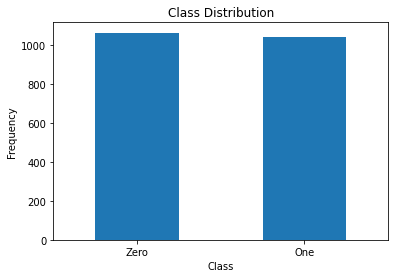

In [8]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 512) (1063, 512)


In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [11]:
print(X_res.shape)
print(y_res.shape)

(2126, 511)
(2126,)


In [12]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [13]:
X.shape

(2126, 511)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [15]:
print(X_train.shape)
print(X_test.shape)

(1700, 511)
(426, 511)


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train = X_train.reshape(1700, 511,1)
X_test = X_test.reshape(426, 511, 1)

In [19]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (511,1))) ##1st conv layer
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [20]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 12s 20ms/step - loss: 0.7265 - accuracy: 0.5771 - val_loss: 0.6785 - val_accuracy: 0.6315
Epoch 2/50
54/54 [==============================] - 1s 13ms/step - loss: 0.6526 - accuracy: 0.6341 - val_loss: 0.6649 - val_accuracy: 0.6291
Epoch 3/50
54/54 [==============================] - 1s 13ms/step - loss: 0.5857 - accuracy: 0.7041 - val_loss: 0.6563 - val_accuracy: 0.5962
Epoch 4/50
54/54 [==============================] - 1s 13ms/step - loss: 0.5575 - accuracy: 0.7300 - val_loss: 0.6310 - val_accuracy: 0.6737
Epoch 5/50
54/54 [==============================] - 1s 13ms/step - loss: 0.5349 - accuracy: 0.7359 - val_loss: 0.6199 - val_accuracy: 0.6502
Epoch 6/50
54/54 [==============================] - 1s 13ms/step - loss: 0.5034 - accuracy: 0.7606 - val_loss: 0.5965 - val_accuracy: 0.6878
Epoch 7/50
54/54 [==============================] - 1s 12ms/step - loss: 0.4802 - accuracy: 0.7718 - val_loss: 0.5915 - val_accuracy: 0.7066
Epoch 8/50
5

In [23]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn1 = model.predict(X_test).ravel()
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_cnn1)
from sklearn.metrics import auc
auc_score1 = auc(fpr_1, tpr_1)
auc_score1

0.7773590760977989

#### for AUPR Curve

In [24]:
from sklearn.metrics import average_precision_score, precision_recall_curve

# Data to plot precision - recall curve
#y_score = clf.predict_proba(X_test)[:, 1]
y_pred_cnn1 = model.predict(X_test).ravel()
precision_1, recall_1, thresholds = precision_recall_curve(y_test, y_pred_cnn1)
# Use AUC function to calculate the area under the curve of precision recall curve
aupr_score1 = auc(recall_1, precision_1)
print(aupr_score1)

0.7807311443869752


Text(0.5, 0, 'Recall')

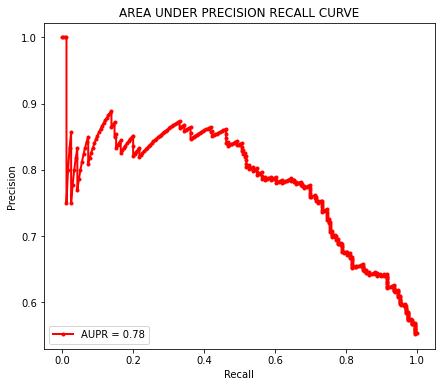

In [25]:
plt.figure(figsize=(7,6))
plt.title('AREA UNDER PRECISION RECALL CURVE')
plt.plot(recall_1, precision_1,color='red',label='AUPR = %0.2f' % aupr_score1,marker='.',linewidth=2,markersize=6)
plt.legend(loc = 'lower left')
plt.ylabel('Precision')
plt.xlabel('Recall')

In [ ]:
#aupr = auc(0.6410, 0.8621)
#aupr
#aupr = auc(recall, precision)

## 2.FastText

In [26]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/fastAllghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
df = pd.read_csv(file_name, index_col=0)
#df = pd.read_csv(file_name)
#print(df.head()) # print the first 5 rows
df

,tpc1,tpc2,tpc3,tpc4,tpc5,tpc6,tpc7,tpc8,tpc9,tpc10,...,tpc503,tpc504,tpc505,tpc506,tpc507,tpc508,tpc509,tpc510,tpc511,Target
tpc0,,,,,,,,,,,,,,,,,,,,,
-0.045342,-0.119586,0.006219,-0.088131,0.107532,0.033074,-0.006158,-0.049008,-0.041383,-0.035325,-0.045906,...,0.071249,-0.027845,-0.030502,0.009951,0.050119,0.098214,0.017533,0.061429,-0.049693,0
-0.035070,-0.122000,0.005920,-0.095999,0.114729,0.036265,-0.007036,-0.053136,-0.048028,-0.027183,-0.044998,...,0.066538,-0.027696,-0.041256,0.003160,0.065386,0.091022,0.004784,0.061484,-0.045020,1
-0.046473,-0.130959,0.012476,-0.091737,0.110245,0.033604,-0.001858,-0.046605,-0.042545,-0.005615,-0.042727,...,0.069494,-0.021039,-0.040292,0.034493,0.052987,0.091800,-0.000009,0.062600,-0.046067,0
-0.048181,-0.113189,-0.000034,-0.076156,0.108456,0.039504,-0.002577,-0.043908,-0.053065,-0.024547,-0.044380,...,0.073099,-0.031108,-0.030192,0.012665,0.046753,0.096642,0.025364,0.062720,-0.049914,0
-0.053381,-0.134055,0.009311,-0.087240,0.109450,0.019906,-0.003768,-0.045313,-0.037604,-0.012921,-0.048937,...,0.064635,-0.022508,-0.039198,0.025195,0.034705,0.083352,0.013108,0.063144,-0.041926,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.043920,-0.121584,0.014005,-0.084963,0.104718,0.033611,-0.004889,-0.048137,-0.042125,-0.022699,-0.044211,...,0.076293,-0.031191,-0.032939,0.020326,0.051676,0.095220,0.010814,0.061951,-0.038777,1
-0.041732,-0.114830,-0.000689,-0.084804,0.112233,0.035672,-0.006310,-0.052984,-0.049038,-0.023203,-0.043603,...,0.066840,-0.038906,-0.038633,0.006369,0.062928,0.092793,0.014985,0.062366,-0.047240,1
-0.037013,-0.125557,0.010711,-0.091457,0.110572,0.035698,-0.007552,-0.050016,-0.041856,-0.017896,-0.047057,...,0.066956,-0.019128,-0.042517,0.015693,0.063621,0.087850,0.004585,0.062977,-0.052326,1


In [27]:
df.shape

(2104, 512)

In [28]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [29]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(0)
X = X
y = y
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(2104, 511)
(2104,)


Text(0, 0.5, 'Frequency')

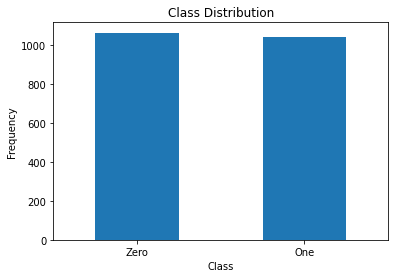

In [30]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [31]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 512) (1063, 512)


In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [33]:
print(X_res.shape)
print(y_res.shape)

(2126, 511)
(2126,)


In [34]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

X.shape

(2126, 511)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [36]:
print(X_train.shape)
print(X_test.shape)

(1700, 511)
(426, 511)


In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train = X_train.reshape(1700, 511,1)
X_test = X_test.reshape(426, 511, 1)

In [40]:
epochs =50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (511,1))) ##1st conv layer
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [41]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 4s 38ms/step - loss: 0.7146 - accuracy: 0.6082 - val_loss: 0.6661 - val_accuracy: 0.6385
Epoch 2/50
54/54 [==============================] - 1s 13ms/step - loss: 0.5867 - accuracy: 0.6924 - val_loss: 0.6573 - val_accuracy: 0.6174
Epoch 3/50
54/54 [==============================] - 1s 13ms/step - loss: 0.5438 - accuracy: 0.7171 - val_loss: 0.6371 - val_accuracy: 0.6549
Epoch 4/50
54/54 [==============================] - 1s 13ms/step - loss: 0.4911 - accuracy: 0.7529 - val_loss: 0.6158 - val_accuracy: 0.6761
Epoch 5/50
54/54 [==============================] - 1s 12ms/step - loss: 0.4647 - accuracy: 0.7806 - val_loss: 0.6000 - val_accuracy: 0.6784
Epoch 6/50
54/54 [==============================] - 1s 12ms/step - loss: 0.4282 - accuracy: 0.8141 - val_loss: 0.5902 - val_accuracy: 0.6925
Epoch 7/50
54/54 [==============================] - 1s 13ms/step - loss: 0.4109 - accuracy: 0.8294 - val_loss: 0.5840 - val_accuracy: 0.6972
Epoch 8/50
54

In [42]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn2 = model.predict(X_test).ravel()
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred_cnn2)
from sklearn.metrics import auc
auc_score2 = auc(fpr_2, tpr_2)
auc_score2

0.7785560703123269

In [43]:
from sklearn.metrics import average_precision_score, precision_recall_curve

y_pred_cnn2 = model.predict(X_test).ravel()
precision_2, recall_2, thresholds = precision_recall_curve(y_test, y_pred_cnn2)

aupr_score2 = auc(recall_2, precision_2)
print(aupr_score2)

0.7716753586992818


## 3.Word2Vec

In [44]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/word2vecAllghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
df = pd.read_csv(file_name, index_col=0)
#df = pd.read_csv(file_name)
#print(df.head()) # print the first 5 rows
df

,tpc1,tpc2,tpc3,tpc4,tpc5,tpc6,tpc7,tpc8,tpc9,tpc10,...,tpc503,tpc504,tpc505,tpc506,tpc507,tpc508,tpc509,tpc510,tpc511,Target
tpc0,,,,,,,,,,,,,,,,,,,,,
-0.037980,-0.022374,-0.000357,-0.052267,-0.080404,-0.026881,0.054797,-0.015409,-0.011325,-0.086878,-0.049168,...,-0.016386,0.069154,-0.036884,-0.063003,-0.025940,-0.018162,-0.058889,0.038233,-0.054769,0
-0.046191,-0.036129,-0.002969,-0.074574,-0.081948,-0.029251,0.039459,-0.008533,-0.009899,-0.084967,-0.047318,...,-0.011916,0.075506,-0.035777,-0.071198,-0.021577,-0.018990,-0.068998,0.038115,-0.053785,1
-0.039378,-0.029917,-0.002562,-0.051458,-0.080362,-0.040203,0.048534,0.002905,-0.015046,-0.078904,-0.044748,...,-0.015752,0.067525,-0.024492,-0.072688,-0.020258,-0.016679,-0.069656,0.024425,-0.054232,0
-0.037194,-0.028180,0.002139,-0.050322,-0.086340,-0.028409,0.051199,-0.011362,-0.014576,-0.086905,-0.051721,...,-0.008505,0.067997,-0.035360,-0.068766,-0.022651,-0.016767,-0.059751,0.035481,-0.051175,0
-0.038799,-0.011877,0.008337,-0.024062,-0.086949,-0.031327,0.053610,-0.003705,-0.022229,-0.075298,-0.044640,...,-0.026913,0.064437,-0.028088,-0.065136,-0.033341,-0.011983,-0.060205,0.029901,-0.052348,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.035127,-0.025364,-0.005092,-0.051440,-0.087592,-0.032727,0.044721,-0.005408,-0.013662,-0.085221,-0.048389,...,-0.017075,0.070939,-0.032283,-0.065380,-0.024029,-0.016608,-0.063072,0.032563,-0.052832,1
-0.040461,-0.027793,-0.002266,-0.064466,-0.082948,-0.030396,0.041946,-0.009911,-0.010617,-0.082913,-0.043966,...,-0.015115,0.075318,-0.036529,-0.067973,-0.021901,-0.015374,-0.065092,0.039050,-0.050543,1
-0.040884,-0.032834,0.000521,-0.061286,-0.083521,-0.033411,0.044535,-0.003691,-0.013037,-0.082547,-0.047447,...,-0.013392,0.072140,-0.033799,-0.066692,-0.023416,-0.023398,-0.068315,0.029874,-0.052421,1


In [45]:
df.shape

(2104, 512)

In [46]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [47]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(0)
X = X
y = y
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(2104, 511)
(2104,)


Text(0, 0.5, 'Frequency')

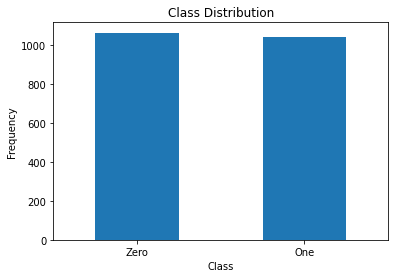

In [48]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [49]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 512) (1063, 512)


In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [51]:
print(X_res.shape)
print(y_res.shape)

(2126, 511)
(2126,)


In [52]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [53]:
X.shape

(2126, 511)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [55]:
print(X_train.shape)
print(X_test.shape)

(1700, 511)
(426, 511)


In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train = X_train.reshape(1700, 511,1)
X_test = X_test.reshape(426, 511, 1)

In [59]:
epochs =50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (511,1))) ##1st conv layer
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [60]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 4s 25ms/step - loss: 0.7856 - accuracy: 0.5606 - val_loss: 0.6740 - val_accuracy: 0.6103
Epoch 2/50
54/54 [==============================] - 1s 14ms/step - loss: 0.6496 - accuracy: 0.6482 - val_loss: 0.6612 - val_accuracy: 0.6150
Epoch 3/50
54/54 [==============================] - 1s 13ms/step - loss: 0.5914 - accuracy: 0.7029 - val_loss: 0.6338 - val_accuracy: 0.6573
Epoch 4/50
54/54 [==============================] - 1s 12ms/step - loss: 0.5465 - accuracy: 0.7224 - val_loss: 0.6231 - val_accuracy: 0.6432
Epoch 5/50
54/54 [==============================] - 1s 12ms/step - loss: 0.5155 - accuracy: 0.7524 - val_loss: 0.6111 - val_accuracy: 0.6714
Epoch 6/50
54/54 [==============================] - 1s 12ms/step - loss: 0.4822 - accuracy: 0.7588 - val_loss: 0.6130 - val_accuracy: 0.6596
Epoch 7/50
54/54 [==============================] - 1s 12ms/step - loss: 0.4553 - accuracy: 0.7935 - val_loss: 0.6093 - val_accuracy: 0.6690
Epoch 8/50
54

In [61]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn3 = model.predict(X_test).ravel()
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_pred_cnn3)
from sklearn.metrics import auc
auc_score3 = auc(fpr_3, tpr_3)
auc_score3

0.770775607917895

In [62]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn3 = model.predict(X_test).ravel()
precision_3, recall_3, thresholds = precision_recall_curve(y_test, y_pred_cnn3)
aupr_score3 = auc(recall_3, precision_3)
print(aupr_score3)

0.7444984872871666


## 4.Glove+FastText

In [63]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/fasttext+Glove_allghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
#df = pd.read_csv(file_name, index_col=0)
df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

       tpc0      tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
0 -0.045342 -0.119586  0.006219 -0.088131  0.107532  0.033074 -0.006158   
1 -0.035070 -0.122000  0.005920 -0.095999  0.114729  0.036265 -0.007036   
2 -0.046473 -0.130959  0.012476 -0.091737  0.110245  0.033604 -0.001858   
3 -0.048181 -0.113189 -0.000034 -0.076156  0.108456  0.039504 -0.002577   
4 -0.053381 -0.134055  0.009311 -0.087240  0.109450  0.019906 -0.003768   

       tpc7      tpc8      tpc9  ...   PSSM504   PSSM505   PSSM506   PSSM507  \
0 -0.049008 -0.041383 -0.035325  ...  0.034153 -0.028236  0.067696 -0.096331   
1 -0.053136 -0.048028 -0.027183  ...  0.035826 -0.019969  0.041198 -0.089281   
2 -0.046605 -0.042545 -0.005615  ...  0.027479 -0.015310  0.053065 -0.039859   
3 -0.043908 -0.053065 -0.024547  ...  0.037971 -0.036039  0.087234 -0.085197   
4 -0.045313 -0.037604 -0.012921  ...  0.012862 -0.017681  0.083901 -0.106877   

    PSSM508   PSSM509   PSSM510   PSSM511   PSSM512  Target  
0  0.0

In [64]:
df.shape

(2104, 1025)

In [65]:
features = np.array(df.columns[:-1])
target = 'Target'

In [66]:
X = df[features]
y = df[target]

In [67]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(0)
X = X
y = y
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(2104, 1024)
(2104,)


Text(0, 0.5, 'Frequency')

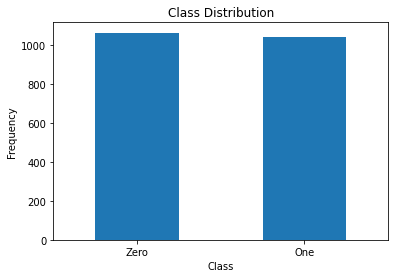

In [68]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [69]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 1025) (1063, 1025)


In [70]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [71]:
print(X_res.shape)
print(y_res.shape)

(2126, 1024)
(2126,)


In [72]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [73]:
X.shape

(2126, 1024)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [83]:
print(X_train.shape)
print(X_test.shape)

(1700, 1024)
(426, 1024)


In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
X_train = X_train.reshape(1700, 1024,1)
X_test = X_test.reshape(426, 1024, 1)

In [86]:
epochs =50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1024,1))) ##1st conv layer
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [87]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 4s 31ms/step - loss: 0.7239 - accuracy: 0.6088 - val_loss: 0.6536 - val_accuracy: 0.6432
Epoch 2/50
54/54 [==============================] - 1s 21ms/step - loss: 0.5862 - accuracy: 0.6965 - val_loss: 0.6246 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 1s 21ms/step - loss: 0.5294 - accuracy: 0.7341 - val_loss: 0.6119 - val_accuracy: 0.6831
Epoch 4/50
54/54 [==============================] - 1s 17ms/step - loss: 0.4879 - accuracy: 0.7606 - val_loss: 0.6037 - val_accuracy: 0.6737
Epoch 5/50
54/54 [==============================] - 1s 18ms/step - loss: 0.4441 - accuracy: 0.7988 - val_loss: 0.6023 - val_accuracy: 0.6878
Epoch 6/50
54/54 [==============================] - 1s 17ms/step - loss: 0.4112 - accuracy: 0.8141 - val_loss: 0.5996 - val_accuracy: 0.6854
Epoch 7/50
54/54 [==============================] - 1s 18ms/step - loss: 0.3723 - accuracy: 0.8465 - val_loss: 0.6096 - val_accuracy: 0.6737
Epoch 8/50
54

In [88]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn4 = model.predict(X_test).ravel()
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_pred_cnn4)
from sklearn.metrics import auc
auc_score4 = auc(fpr_4, tpr_4)
auc_score4

0.7612433862433863

In [89]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn4 = model.predict(X_test).ravel()
precision_4, recall_4, thresholds = precision_recall_curve(y_test, y_pred_cnn4)
aupr_score4 = auc(recall_4, precision_4)
print(aupr_score4)

0.727478688761841


## 5. Glove+Word2vec

In [90]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/word2vec+Glove_allghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
#df = pd.read_csv(file_name, index_col=0)
df = pd.read_csv(file_name)
#print(df.head()) # print the first 5 rows
df

,tpc0,tpc1,tpc2,tpc3,tpc4,tpc5,tpc6,tpc7,tpc8,tpc9,...,PSSM504,PSSM505,PSSM506,PSSM507,PSSM508,PSSM509,PSSM510,PSSM511,Glove512,Target
0,-0.037980,-0.022374,-0.000357,-0.052267,-0.080404,-0.026881,0.054797,-0.015409,-0.011325,-0.086878,...,0.034153,-0.028236,0.067696,-0.096331,0.025590,0.039283,-0.050542,0.122821,-0.076334,0
1,-0.046191,-0.036129,-0.002969,-0.074574,-0.081948,-0.029251,0.039459,-0.008533,-0.009899,-0.084967,...,0.035826,-0.019969,0.041198,-0.089281,0.003722,0.021992,-0.056355,0.113405,-0.034552,1
2,-0.039378,-0.029917,-0.002562,-0.051458,-0.080362,-0.040203,0.048534,0.002905,-0.015046,-0.078904,...,0.027479,-0.015310,0.053065,-0.039859,0.043501,0.054468,-0.056376,0.150060,-0.062847,0
3,-0.037194,-0.028180,0.002139,-0.050322,-0.086340,-0.028409,0.051199,-0.011362,-0.014576,-0.086905,...,0.037971,-0.036039,0.087234,-0.085197,0.009901,0.028044,-0.068661,0.123129,-0.058323,0
4,-0.038799,-0.011877,0.008337,-0.024062,-0.086949,-0.031327,0.053610,-0.003705,-0.022229,-0.075298,...,0.012862,-0.017681,0.083901,-0.106877,0.073434,0.078891,-0.050987,0.136574,-0.083851,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,-0.035127,-0.025364,-0.005092,-0.051440,-0.087592,-0.032727,0.044721,-0.005408,-0.013662,-0.085221,...,0.035764,-0.030800,0.053166,-0.087982,0.036373,0.044850,-0.048145,0.133063,-0.077309,1
2100,-0.040461,-0.027793,-0.002266,-0.064466,-0.082948,-0.030396,0.041946,-0.009911,-0.010617,-0.082913,...,0.036054,-0.019750,0.043185,-0.082701,0.003797,0.002908,-0.049733,0.128894,-0.050292,1
2101,-0.040884,-0.032834,0.000521,-0.061286,-0.083521,-0.033411,0.044535,-0.003691,-0.013037,-0.082547,...,0.029697,-0.020232,0.058662,-0.077783,0.034834,0.037907,-0.061262,0.119205,-0.055102,1
2102,-0.034488,-0.028598,0.003122,-0.053502,-0.086741,-0.035552,0.051656,-0.006196,-0.015891,-0.088053,...,0.039605,-0.026920,0.071995,-0.083947,0.026094,0.040602,-0.062820,0.153210,-0.068933,1


In [91]:
df.shape

(2104, 1025)

In [92]:
features = np.array(df.columns[:-1])
target = 'Target'

In [93]:
X = df[features]
y = df[target]

In [94]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(0)
X = X
y = y
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(2104, 1024)
(2104,)


Text(0, 0.5, 'Frequency')

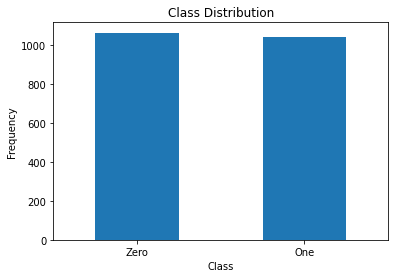

In [95]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [96]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 1025) (1063, 1025)


In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [98]:
print(X_res.shape)
print(y_res.shape)

(2126, 1024)
(2126,)


In [99]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [101]:
print(X_train.shape)
print(X_test.shape)

(1700, 1024)
(426, 1024)


In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(1700, 1024,1)
X_test = X_test.reshape(426, 1024, 1)

In [103]:
epochs =50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1024,1))) ##1st conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [104]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 4s 32ms/step - loss: 0.7721 - accuracy: 0.5953 - val_loss: 0.6704 - val_accuracy: 0.6408
Epoch 2/50
54/54 [==============================] - 1s 20ms/step - loss: 0.5817 - accuracy: 0.6894 - val_loss: 0.6532 - val_accuracy: 0.6408
Epoch 3/50
54/54 [==============================] - 1s 18ms/step - loss: 0.4943 - accuracy: 0.7553 - val_loss: 0.6334 - val_accuracy: 0.6784
Epoch 4/50
54/54 [==============================] - 1s 18ms/step - loss: 0.4386 - accuracy: 0.8135 - val_loss: 0.6132 - val_accuracy: 0.6667
Epoch 5/50
54/54 [==============================] - 1s 17ms/step - loss: 0.3954 - accuracy: 0.8312 - val_loss: 0.5981 - val_accuracy: 0.6925
Epoch 6/50
54/54 [==============================] - 1s 18ms/step - loss: 0.3493 - accuracy: 0.8594 - val_loss: 0.5900 - val_accuracy: 0.6878
Epoch 7/50
54/54 [==============================] - 1s 17ms/step - loss: 0.3128 - accuracy: 0.8888 - val_loss: 0.5849 - val_accuracy: 0.7113
Epoch 8/50
54

In [105]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn5 = model.predict(X_test).ravel()
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_pred_cnn5)
from sklearn.metrics import auc
auc_score5 = auc(fpr_5, tpr_5)
auc_score5

0.7570987654320989

In [106]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn5 = model.predict(X_test).ravel()
precision_5, recall_5, thresholds = precision_recall_curve(y_test, y_pred_cnn5)
aupr_score5 = auc(recall_5, precision_5)
print(aupr_score5)

0.7089563797042637


## 6. FastText+Word2vec

In [107]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/word2vec+fasttext_allghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
#df = pd.read_csv(file_name, index_col=0)
df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

       tpc0      tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
0 -0.037980 -0.022374 -0.000357 -0.052267 -0.080404 -0.026881  0.054797   
1 -0.046191 -0.036129 -0.002969 -0.074574 -0.081948 -0.029251  0.039459   
2 -0.039378 -0.029917 -0.002562 -0.051458 -0.080362 -0.040203  0.048534   
3 -0.037194 -0.028180  0.002139 -0.050322 -0.086340 -0.028409  0.051199   
4 -0.038799 -0.011877  0.008337 -0.024062 -0.086949 -0.031327  0.053610   

       tpc7      tpc8      tpc9  ...   PSSM504   PSSM505   PSSM506   PSSM507  \
0 -0.015409 -0.011325 -0.086878  ...  0.071249 -0.027845 -0.030502  0.009951   
1 -0.008533 -0.009899 -0.084967  ...  0.066538 -0.027696 -0.041256  0.003160   
2  0.002905 -0.015046 -0.078904  ...  0.069494 -0.021039 -0.040292  0.034493   
3 -0.011362 -0.014576 -0.086905  ...  0.073099 -0.031108 -0.030192  0.012665   
4 -0.003705 -0.022229 -0.075298  ...  0.064635 -0.022508 -0.039198  0.025195   

    PSSM508   PSSM509   PSSM510   PSSM511   Fast512  Target  
0  0.0

In [108]:
df.shape

(2104, 1025)

In [109]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

In [110]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(0)
X = X
y = y
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(2104, 1024)
(2104,)


Text(0, 0.5, 'Frequency')

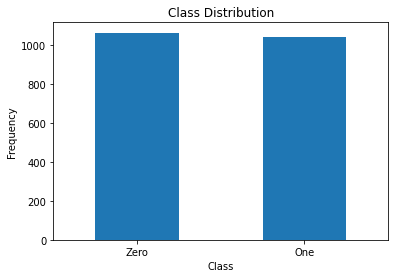

In [111]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [112]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 1025) (1063, 1025)


In [113]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [114]:
print(X_res.shape)
print(y_res.shape)

(2126, 1024)
(2126,)


In [115]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [130]:
print(X_train.shape)
print(X_test.shape)

(1700, 1024)
(426, 1024)


In [131]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
X_train = X_train.reshape(1700, 1024,1)
X_test = X_test.reshape(426, 1024, 1)

In [133]:
epochs =40
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1024,1))) ##1st conv layer
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [134]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
54/54 [==============================] - 4s 33ms/step - loss: 0.7339 - accuracy: 0.6065 - val_loss: 0.6666 - val_accuracy: 0.6080
Epoch 2/40
54/54 [==============================] - 1s 24ms/step - loss: 0.5646 - accuracy: 0.7282 - val_loss: 0.6681 - val_accuracy: 0.5681
Epoch 3/40
54/54 [==============================] - 1s 22ms/step - loss: 0.5078 - accuracy: 0.7600 - val_loss: 0.6381 - val_accuracy: 0.6244
Epoch 4/40
54/54 [==============================] - 1s 21ms/step - loss: 0.4385 - accuracy: 0.8000 - val_loss: 0.6787 - val_accuracy: 0.6103
Epoch 5/40
54/54 [==============================] - 1s 21ms/step - loss: 0.3940 - accuracy: 0.8312 - val_loss: 0.6540 - val_accuracy: 0.6009
Epoch 6/40
54/54 [==============================] - 1s 18ms/step - loss: 0.3596 - accuracy: 0.8582 - val_loss: 0.6507 - val_accuracy: 0.6502
Epoch 7/40
54/54 [==============================] - 1s 17ms/step - loss: 0.3278 - accuracy: 0.8694 - val_loss: 0.6453 - val_accuracy: 0.6643
Epoch 8/40
54

In [135]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn6 = model.predict(X_test).ravel()
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_pred_cnn6)
from sklearn.metrics import auc
auc_score6 = auc(fpr_6, tpr_6)
auc_score6

0.7211115774591884

In [136]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn6 = model.predict(X_test).ravel()
precision_6, recall_6, thresholds = precision_recall_curve(y_test, y_pred_cnn6)
aupr_score6 = auc(recall_6, precision_6)
print(aupr_score6)

0.6765816874021386


## 7. Glove + FastText +Word2vec

In [137]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/word2vec+fasttext+glove_allghor.csv'
# Glove3decimal.csv
# Gloveallghor.csv 
#df = pd.read_csv(file_name, index_col=0)
df = pd.read_csv(file_name)
print(df.head()) # print the first 5 rows

       tpc0      tpc1      tpc2      tpc3      tpc4      tpc5      tpc6  \
0 -0.037980 -0.022374 -0.000357 -0.052267 -0.080404 -0.026881  0.054797   
1 -0.046191 -0.036129 -0.002969 -0.074574 -0.081948 -0.029251  0.039459   
2 -0.039378 -0.029917 -0.002562 -0.051458 -0.080362 -0.040203  0.048534   
3 -0.037194 -0.028180  0.002139 -0.050322 -0.086340 -0.028409  0.051199   
4 -0.038799 -0.011877  0.008337 -0.024062 -0.086949 -0.031327  0.053610   

       tpc7      tpc8      tpc9  ...   glov503   glov504   glov505   glov506  \
0 -0.015409 -0.011325 -0.086878  ...  0.034153 -0.028236  0.067696 -0.096331   
1 -0.008533 -0.009899 -0.084967  ...  0.035826 -0.019969  0.041198 -0.089281   
2  0.002905 -0.015046 -0.078904  ...  0.027479 -0.015310  0.053065 -0.039859   
3 -0.011362 -0.014576 -0.086905  ...  0.037971 -0.036039  0.087234 -0.085197   
4 -0.003705 -0.022229 -0.075298  ...  0.012862 -0.017681  0.083901 -0.106877   

    glov507   glov508   glov509   glov510   glov511  Target  
0  0.0

In [138]:
df.shape

(2104, 1537)

In [139]:
features = np.array(df.columns[:-1])
target = 'Target'

In [140]:
X = df[features]
y = df[target]

In [141]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(0)
X = X
y = y
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(2104, 1536)
(2104,)


Text(0, 0.5, 'Frequency')

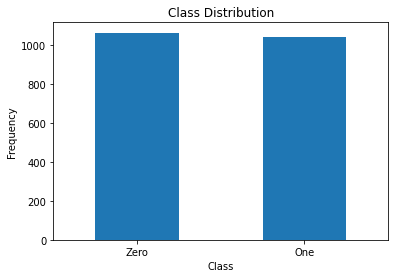

In [142]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [143]:
One = df[y==1]

Zero = df[y==0]

print(Zero.shape,One.shape)

(1041, 1537) (1063, 1537)


In [144]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_res,y_res=sm.fit_resample(X,y)

In [145]:
print(X_res.shape)
print(y_res.shape)

(2126, 1536)
(2126,)


In [146]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [192]:
print(X_train.shape)
print(X_test.shape)

(1700, 1536)
(426, 1536)


In [193]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [194]:
X_train = X_train.reshape(1700, 1536,1)
X_test = X_test.reshape(426, 1536, 1)

In [199]:
epochs =45
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1536,1))) ##1st conv layer
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))  #2nd Conv layer
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())    #Flattening
model.add(Dense(64, activation='relu'))  ##fully connected layer
#model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))   #output layer

In [200]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), verbose=1)

Epoch 1/45
54/54 [==============================] - 4s 37ms/step - loss: 0.7264 - accuracy: 0.6094 - val_loss: 0.6601 - val_accuracy: 0.6479
Epoch 2/45
54/54 [==============================] - 1s 25ms/step - loss: 0.5496 - accuracy: 0.7082 - val_loss: 0.6832 - val_accuracy: 0.5540
Epoch 3/45
54/54 [==============================] - 2s 29ms/step - loss: 0.4817 - accuracy: 0.7653 - val_loss: 0.6158 - val_accuracy: 0.6714
Epoch 4/45
54/54 [==============================] - 1s 26ms/step - loss: 0.4128 - accuracy: 0.8065 - val_loss: 0.6039 - val_accuracy: 0.6831
Epoch 5/45
54/54 [==============================] - 1s 23ms/step - loss: 0.3596 - accuracy: 0.8459 - val_loss: 0.6439 - val_accuracy: 0.6479
Epoch 6/45
54/54 [==============================] - 1s 23ms/step - loss: 0.3209 - accuracy: 0.8765 - val_loss: 0.6284 - val_accuracy: 0.6620
Epoch 7/45
54/54 [==============================] - 1s 22ms/step - loss: 0.2702 - accuracy: 0.9100 - val_loss: 0.6545 - val_accuracy: 0.6643
Epoch 8/45
54

In [201]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn7 = model.predict(X_test).ravel()
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_pred_cnn7)
from sklearn.metrics import auc
auc_score7 = auc(fpr_7, tpr_7)
auc_score7

0.7346560846560847

In [202]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_cnn7 = model.predict(X_test).ravel()
precision_7, recall_7, thresholds = precision_recall_curve(y_test, y_pred_cnn7)
aupr_score7 = auc(recall_7, precision_7)
print(aupr_score7)

0.7080927332545361


In [203]:
#auc_score1 = 0.8639
#auc_score2 = 0.8394
#auc_score3 = 0.8198
#auc_score4 = 0.8261
#auc_score5 = 0.8096
#auc_score6 = 0.7853
#auc_score7 = 0.7931

aupr_score1 = 0.7807
aupr_score2 = 0.77167
aupr_score3 = 0.74449
aupr_score4 = 0.72747
aupr_score5 = 0.70895
aupr_score6 = 0.67658
aupr_score7 = 0.6912


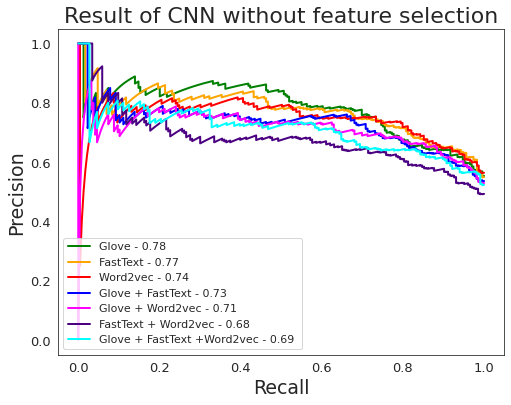

In [207]:
sns.set_style("white")
plt.figure(figsize=(8,6))

plt.plot(recall_1,precision_1, color = "green", label = "Glove - %0.2f " %aupr_score1, lw = 2)
plt.plot(recall_2,precision_2, color = "orange", label = "FastText - %0.2f " %aupr_score2, lw = 2)
plt.plot(recall_3,precision_3, color = "red", label = "Word2vec - %0.2f " %aupr_score3, lw = 2)
plt.plot(recall_4,precision_4, color = "blue", label = "Glove + FastText - %0.2f " %aupr_score4, lw = 2)

plt.plot(recall_5,precision_5, color = "magenta", label = "Glove + Word2vec - %0.2f " %aupr_score5, lw = 2)
plt.plot(recall_6,precision_6, color = "indigo", label = "FastText + Word2vec - %0.2f " %aupr_score6, lw = 2)
plt.plot(recall_7,precision_7, color = "cyan", label = "Glove + FastText +Word2vec - %0.2f " %aupr_score7, lw = 2)

#plt.plot([0,1], [0,1], color = 'purple', lw=2, linestyle='--')
plt.xlabel('Recall', fontsize = 19)
plt.ylabel('Precision', fontsize=19)
plt.title('Result of CNN without feature selection', fontsize=22)
plt.legend(loc = "lower left", fontsize=11)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('AUPR_all',dpi=300)
plt.show()

In [205]:
plt.savefig('/content/gdrive/MyDrive/fig/Table-1 Without FST AUPR.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(7,6))
plt.title('AREA UNDER PRECISION RECALL CURVE')
plt.plot(recall, precision,color='red',label='AUPR = %0.2f' % auc_precision_recall,marker='.',linewidth=3,markersize=8)
plt.legend(loc = 'lower right')
plt.ylabel('Precision')
plt.xlabel('Recall')